In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
linkwhite='https://drive.google.com/open?id=1XBIV3UcGD9huBlsotNAH2pTlwoajNx0Q'
fluff, id2 = linkwhite.split('=')
print (id2)

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('credit_dataset.csv')  
dataframe = pd.read_csv('credit_dataset.csv', index_col=0)
dataframe.head()

1XBIV3UcGD9huBlsotNAH2pTlwoajNx0Q


,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [4]:
# Change behaviour globaly
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# Copy
df = dataframe.copy()

In [6]:
# Shape dataframe
print('Rows    :', df.shape[0])
print('Columns :', df.shape[1])

Rows    : 25134
Columns : 19


In [7]:
# Preview NULL values
df.isna().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [8]:
# Dtytes
df.dtypes

ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

In [9]:
# Preview unique values
df.nunique()

ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

TARGET variable class distribution

0   0.983
1   0.017
Name: TARGET, dtype: float64


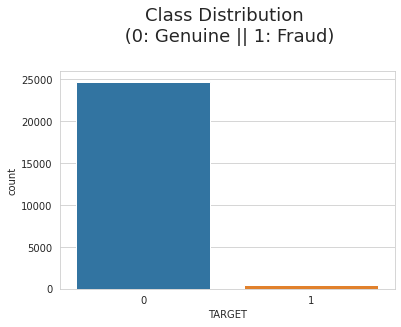

In [10]:
sns.countplot(df.TARGET).set_title('Class Distribution \n (0: Genuine || 1: Fraud)', size=18, pad=30)
print(df.TARGET.value_counts(normalize=True))
plt.show()

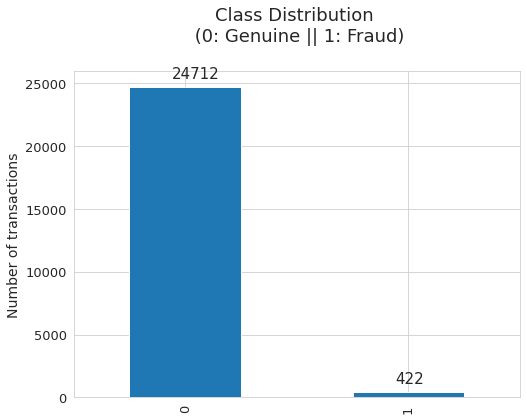

In [11]:
ax = df['TARGET'].value_counts().plot(kind='bar', figsize=(8,6), fontsize=13)
ax.set_title('Class Distribution \n (0: Genuine || 1: Fraud)', size=18, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [12]:
df.describe()

,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000,25134.000,25134.000,25134.000,25134.000,25134.000,25134.000,25134.000,25134.000,25134.000,25134.000,25134.000
mean,5078837.564,0.512,194833.851,1.000,0.274,0.293,0.101,2.294,26.121,40.536,7.204,0.017
std,41941.019,0.788,104510.987,0.000,0.446,0.455,0.301,0.948,16.440,9.559,6.414,0.128
min,5008806.000,0.000,27000.000,1.000,0.000,0.000,0.000,1.000,0.000,21.000,0.000,0.000
25%,5042228.250,0.000,135000.000,1.000,0.000,0.000,0.000,2.000,12.000,33.000,3.000,0.000
50%,5079004.000,0.000,180000.000,1.000,0.000,0.000,0.000,2.000,24.000,40.000,5.000,0.000
75%,5115603.750,1.000,225000.000,1.000,1.000,1.000,0.000,3.000,39.000,48.000,10.000,0.000
max,5150487.000,19.000,1575000.000,1.000,1.000,1.000,1.000,20.000,60.000,67.000,43.000,1.000


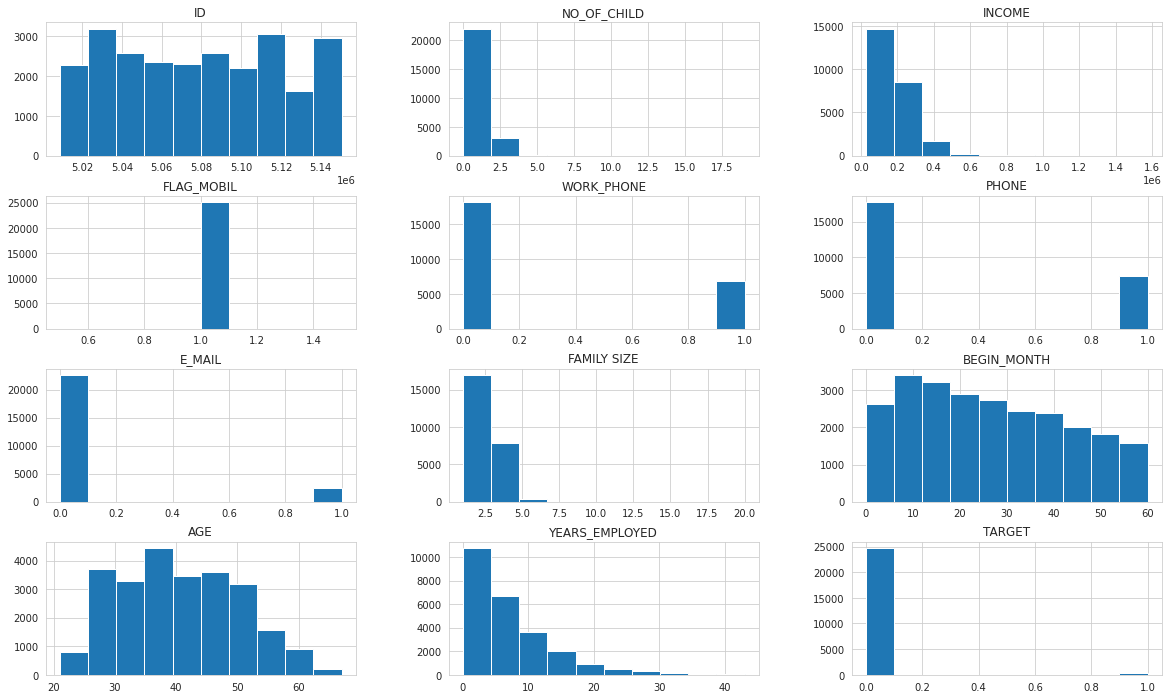

In [13]:
# Distribution of statistical values
df.hist(figsize=(20,12))
plt.show()

In [14]:
# Categorical variables
df.describe(include='O')

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


In [15]:
# Categorical variables with thier values
cols = df.describe(include='O').columns
for i in cols:
  print("Distinct_values :\n 'column_name' =", i)
  print(df[i].unique())
  print('')

Distinct_values :
 'column_name' = GENDER
['M' 'F']

Distinct_values :
 'column_name' = CAR
['Y' 'N']

Distinct_values :
 'column_name' = REALITY
['Y' 'N']

Distinct_values :
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values :
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values :
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values :
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



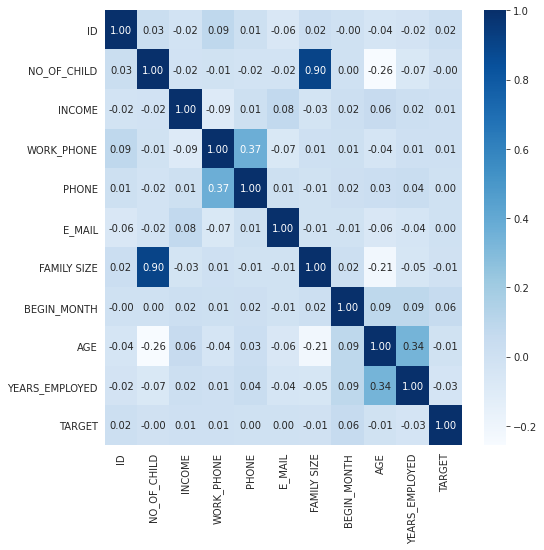

In [16]:
# Drop variable FLAG_MOBIL as all values = 1
correlation = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.drop('FLAG_MOBIL', axis=1).corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [17]:
correlation['TARGET'].sort_values(ascending=False)

TARGET            1.000
BEGIN_MONTH       0.061
ID                0.021
INCOME            0.007
WORK_PHONE        0.006
PHONE             0.003
E_MAIL            0.001
NO_OF_CHILD      -0.001
FAMILY SIZE      -0.006
AGE              -0.008
YEARS_EMPLOYED   -0.033
FLAG_MOBIL          nan
Name: TARGET, dtype: float64

Data preparation

In [18]:
# Remap to integers
df['GENDER'] = [0 if x == 'M' else 1 for x in df['GENDER']]
df['CAR'] = [1 if x == 'Y' else 0 for x in df['CAR']]
df['REALITY'] = [1 if x == 'Y' else 0 for x in df['REALITY']]

# Create dummy variables
dummy_income_type = pd.get_dummies(df['INCOME_TYPE'], prefix='INC_TYPE', drop_first=True)
dummy_edu_type = pd.get_dummies(df['EDUCATION_TYPE'], prefix='EDU_TYPE', drop_first=True)
dummy_family_type = pd.get_dummies(df['FAMILY_TYPE'], prefix='FAM_TYPE', drop_first=True)
dummy_house_type = pd.get_dummies(df['HOUSE_TYPE'], prefix='HOUSE_TYPE', drop_first=True)

# Drop unnecessary columns
to_drop = ['ID', 'FLAG_MOBIL', 'INCOME_TYPE',
           'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']
df.drop(to_drop, axis=1, inplace=True)

# Merge into a single dataframe
merged = pd.concat([df, dummy_income_type, dummy_edu_type, dummy_family_type, dummy_house_type], axis=1)
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,INC_TYPE_Pensioner,INC_TYPE_State servant,INC_TYPE_Student,INC_TYPE_Working,EDU_TYPE_Higher education,EDU_TYPE_Incomplete higher,EDU_TYPE_Lower secondary,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0,112500.000,0,0,0,2.000,29,59,3,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,270000.000,0,1,1,1.000,4,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,270000.000,0,1,1,1.000,26,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0,270000.000,0,1,1,1.000,26,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0,270000.000,0,1,1,1.000,38,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


Data scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns where value > 1
to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled values
for col in scaled:
  merged[col] = scaled[col]

merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,INC_TYPE_Pensioner,INC_TYPE_State servant,INC_TYPE_Student,INC_TYPE_Working,EDU_TYPE_Higher education,EDU_TYPE_Incomplete higher,EDU_TYPE_Lower secondary,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0.000,0.055,0,0,0,0.053,0.483,0.826,0.070,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0.000,0.157,0,1,1,0.000,0.067,0.674,0.186,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0.000,0.157,0,1,1,0.000,0.433,0.674,0.186,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0.000,0.157,0,1,1,0.000,0.433,0.674,0.186,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0.000,0.157,0,1,1,0.000,0.633,0.674,0.186,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [20]:
# Shape dataframe
print('Rows    :', merged.shape[0])
print('Columns :', merged.shape[1])

Rows    : 25134
Columns : 30


ML without SMOTE

In [21]:
from sklearn.model_selection import train_test_split
X = merged.drop('TARGET', axis=1)
y = merged['TARGET']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 1.66
% Positive class in Test  = 1.75


Accuracy = 0.98
 Recall = 0.15



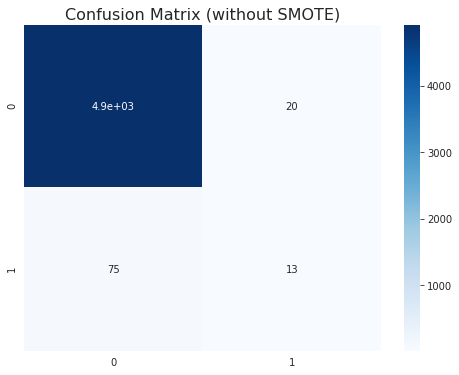

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train classifier
rf = RandomForestClassifier(random_state=43)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\n Recall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

* Recall: of all the true 'Fraud' transactions, this model identified 15% of them

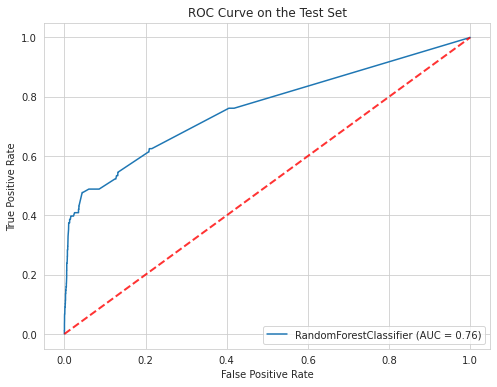

In [23]:
# ROC curve
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(rf, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='TARGET', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()

In [24]:
!pip  install lime

In [25]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['genuine', 'fraud'],
    mode='classification'
)

In [26]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)

ML with SMOTE

In [27]:
!pip install imbalanced-learn

In [28]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=43)
X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (25134, 29)
Shape of X after SMOTE: (49424, 29)


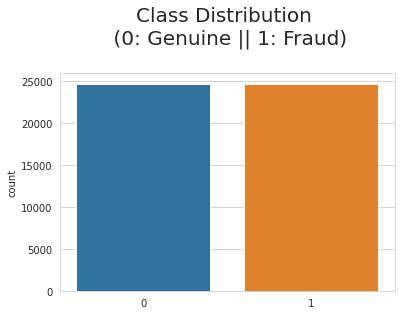

In [29]:
sns.countplot(y_sm).set_title('Class Distribution \n (0: Genuine || 1: Fraud)', size=20, pad=30)
plt.show()

Accuracy = 0.99
Recall = 0.99



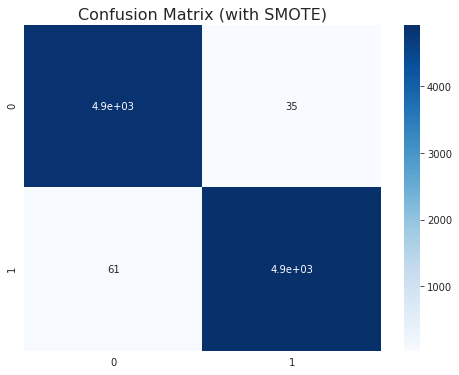

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=43
)

# Train
rf = RandomForestClassifier(random_state=43)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

* Recall: of all the true 'Fraud' transaction, this model identified 99% of them

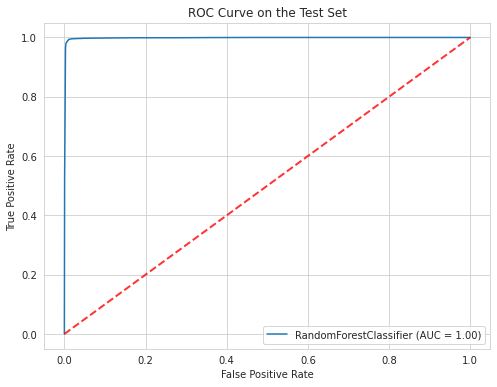

In [31]:
# ROC curve
fig, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(rf, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='TARGET', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()